In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
#apply chart formatting to seaborn plots using matplotlib arguments

In [17]:
housing_raw = pd.read_csv(
    "../Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"}
)

ca_housing = housing_raw.loc[
    (housing_raw["region_name"].str.contains("CA"))
].assign(region_name = housing_raw["region_name"].str[0:-11])

ca_housing_pivot = (ca_housing
                    .pivot_table(
                        index="period_begin",
                        columns="region_name",
                        values="median_active_list_price")
                    .loc[:,
                         ["San Francisco", 
                          "Los Angeles", 
                          "San Diego", 
                          "Tulare"]
                        ]
                    .assign(overall_avg = lambda x: x.mean(axis=1))
                   )

ca_housing_pivot.head()

region_name,San Francisco,Los Angeles,San Diego,Tulare,overall_avg
period_begin,,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8,671136.575
2017-01-09,1233393.7,614061.0,621737.5,227729.1,674230.325
2017-01-16,1239977.0,617311.0,625820.8,229060.4,678042.300
2017-01-23,1247977.0,620644.3,629491.6,229806.2,681979.775
2017-01-30,1253310.4,624541.6,632824.0,230139.5,685203.875


In [21]:
bins = np.linspace(0, 1750000, 8)
labels = ["0-250k", "250k-500k", "500k-750k", "750k-1m", "1-1.25m", "1.25m-1.5m", "1.5m+"]

ca_housing["price_bins"] = pd.cut(
    ca_housing["median_active_list_price"], 
    bins=bins, 
    labels=labels
)

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_bins
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794,250k-500k
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607,500k-750k
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632,250k-500k
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228,250k-500k
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362,250k-500k


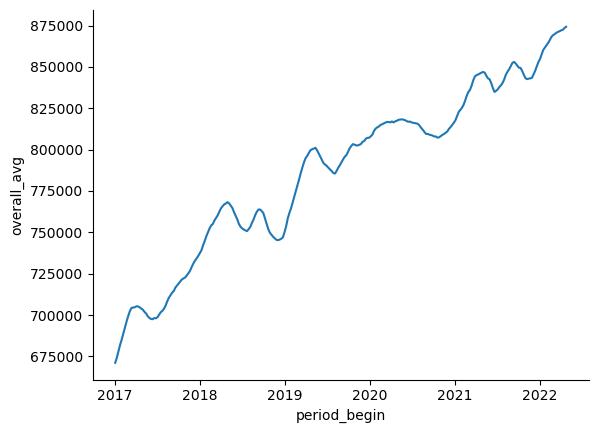

In [41]:
sns.lineplot(
    data=ca_housing_pivot,
    x=ca_housing_pivot.index, # note if we don't specify x and y all df series get plotted
    y="overall_avg"
)

sns.despine()
#for line charts matplotlib is a better choice for these type a things

In [26]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_bins
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794,250k-500k
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607,500k-750k
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632,250k-500k
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228,250k-500k
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362,250k-500k


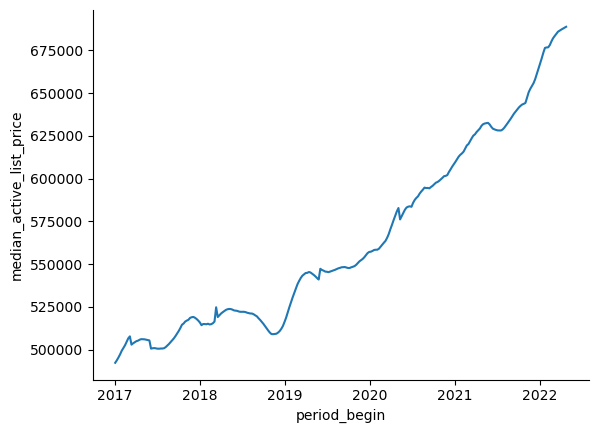

In [36]:
sns.lineplot(
    x="period_begin",
    y="median_active_list_price",
    data=ca_housing,
    errorbar=None,
    #estimator=min
)

sns.despine()

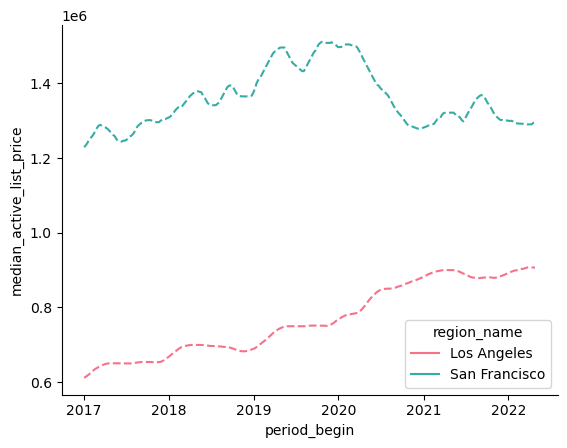

In [39]:
sns.lineplot(
    x="period_begin",
    y="median_active_list_price",
    data=ca_housing.query("region_name in ['Los Angeles', 'San Francisco']"),
    hue="region_name",   #split in the two   
    palette="husl",   #colormap
    ls="--"
)
    
sns.despine()